
# Simulating Combined Signals

Simulate combined signals, with periodic and aperiodic components.

This tutorial covers the ``neurodsp.sim.combined`` module.


In [19]:
# Import sim functions
from neurodsp.sim.combined import sim_combined, sim_peak_oscillation
from neurodsp.sim.aperiodic import sim_powerlaw
from neurodsp.utils import set_random_seed

# Import function to compute power spectra
from neurodsp.spectral import compute_spectrum

# Import utilities for plotting data
from neurodsp.utils import create_times
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series
from matplotlib import pyplot as plt
import numpy as np

In [5]:
# Set the random seed, for consistency simulating data
set_random_seed(0)

# Set some general settings, to be used across all simulations
fs = 1000
n_seconds = 10
times = create_times(n_seconds, fs)

## Simulate Combined Periodic & Aperiodic Signals

In order to simulate a signal that looks more like a brain signal, you may want
to simulate an oscillation together with aperiodic activity.

We can do this with the :func:`~.sim_combined` function, in which you specify
a set of components that you want to add together to create a complex signal.

You can use :func:`~.sim_combined` with any combination
of any of the other simulation functions.

Each component is indicated as a string label, indicating the desired function to use,
in a dictionary, with an associated dictionary of any and all parameters to use for that
component as a dictionary.




## Simulate Peak Oscillation

Next, we will simulate a time series with a peak in the power spectrum, that we can
define in terms of the specific location and shape of the oscillatory peak.

In order to make this simulation, we precompute an aperiodic signal, to which
we can add an oscillatory component to make the overall signal.

To do so, we use the :func:`~.sim_peak_oscillation` function to add an oscillation to
the aperiodic component, specifying a desired central frequency, bandwidth, and peak height.




/var/folders/9k/4csk57xn1q1csdw28xvkxm200000gn/T/ipykernel_61280/3339903331.py:47: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((0, 100))
/var/folders/9k/4csk57xn1q1csdw28xvkxm200000gn/T/ipykernel_61280/3339903331.py:50: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((0, 100))


(np.float64(0.7329114385542688), 100)

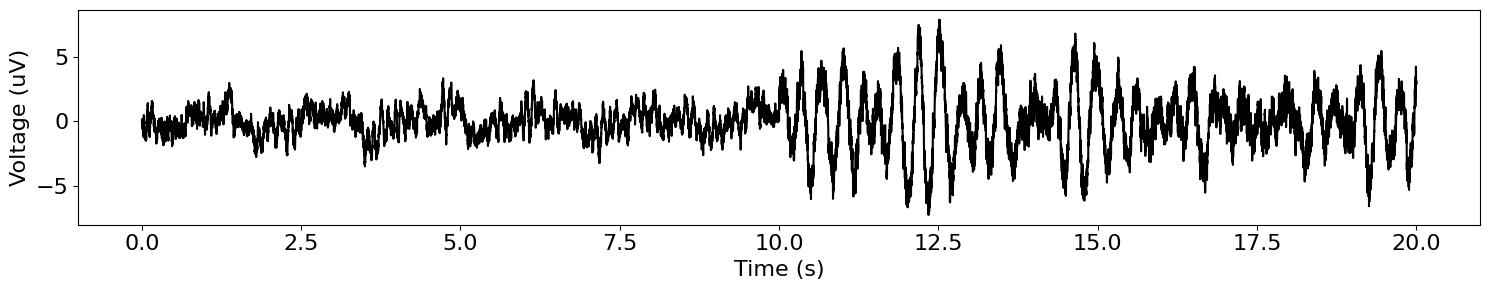

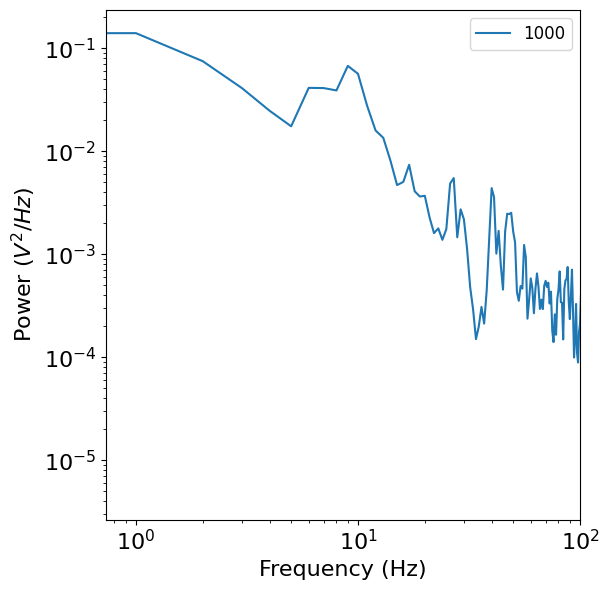

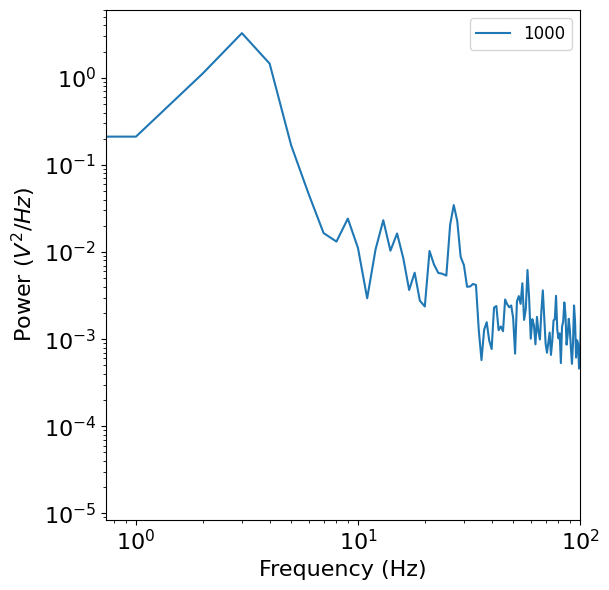

In [31]:
# Precompute an aperiodic time series
def create_neural_signal(peaks, bws, heights, exponent, scale, fs, n_seconds):
    sig = sim_powerlaw(n_seconds, fs, exponent=exponent, f_range=[0.5, None])
    for i in range(len(peaks)):
        sig = sim_peak_oscillation(sig, fs, peaks[i], bws[i], heights[i])
    sig *= scale
    return sig

# Define settings that define the peak to add
## Baseline
peaks = [10,25]
bws= [3,5]
heights = [1, .5]
exponent = -1.5
scale = 1
base_sig = create_neural_signal(peaks, bws, heights, exponent, scale, fs, n_seconds)

# Polyspikes
peaks = [15, 25, 35]  # Multiple spike frequencies
bws = [3, 4, 5]       # Moderate bandwidth
heights = [1.5, 1.2, 0.8]  # High amplitude, decreasing
exponent = -0.5       # Moderate slope to preserve burst frequencies
scale = 3
poly_sig = create_neural_signal(peaks, bws, heights, exponent, scale, fs, n_seconds)

peaks = [3, 3.5]
bws = [1, 1.5]
heights = [1.2, 1.0]
exponent = -1.2
amplitude_scale = 2.5
wave_sig = create_neural_signal(peaks, bws, heights, exponent, amplitude_scale, fs, n_seconds)

# peaks = [20,30,40]
# bws = [5,7,10]
# heights = [.3,.2,.15]

sig = np.hstack([base_sig.reshape(1,-1), wave_sig.reshape(1,-1)])
times = create_times(n_seconds*2, fs)


# Plot the simulated data, in the time domain
plot_time_series(times, sig)

# Plot the simulated data, in the frequency domain
freqs, psd = compute_spectrum(base_sig, fs)
plot_power_spectra(freqs, psd, fs)
plt.xlim((0, 100))
freqs, psd = compute_spectrum(wave_sig, fs)
plot_power_spectra(freqs, psd, fs)
plt.xlim((0, 100))